### `LAB-01 TASK 3: NEURAL NETWORK CLASSIFICATION.`

## MNIST dataset

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist


In [4]:
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
len(train_images)

60000

In [22]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
len(test_images)

10000

In [10]:
import matplotlib.pyplot as plt

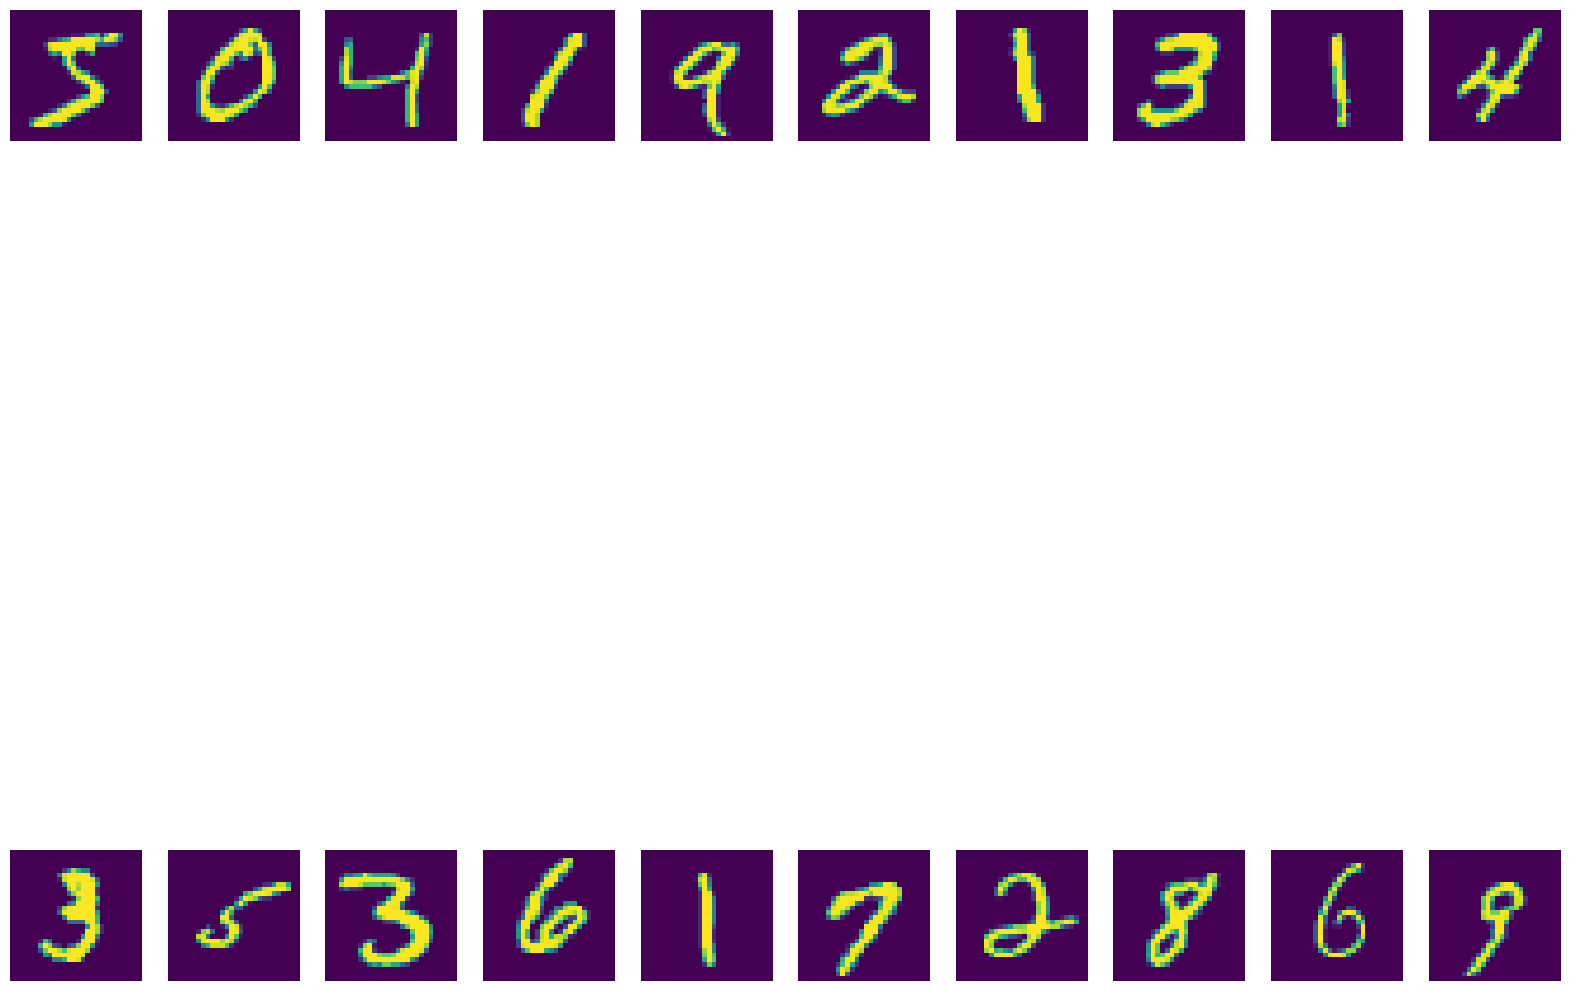

In [24]:
import numpy as np
plt.figure(figsize=(20, 20))
for i in range(20):
    plt.subplot(2, 10,i+1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.show()

Preprocess the images


In [43]:
#train_images = train_images.reshape((60000, 28 * 28))
train_images=train_images.reshape((train_images.shape[0], 28, 28, 1))


In [44]:
train_images = train_images.astype("float32") / 255

In [48]:
test_images=test_images.reshape((test_images.shape[0], 28, 28, 1))


In [49]:
test_images=test_images.astype("float32")/255

In [33]:
from tensorflow.keras import datasets,layers,models

In [45]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         

In [46]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [51]:

history=model.fit(
    train_images, train_labels, 
    epochs=10,
   validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0706 - accuracy: 0.9772 - val_loss: 0.0453 - val_accuracy: 0.9837
Epoch 2/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0697 - accuracy: 0.9772 - val_loss: 0.0508 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0644 - accuracy: 0.9787 - val_loss: 0.0417 - val_accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0606 - accuracy: 0.9797 - val_loss: 0.0468 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0584 - accuracy: 0.9802 - val_loss: 0.0424 - val_accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0566 - accuracy: 0.9815 - val_loss: 0.0418 - val_accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0535 - accuracy: 0.9822 - val_loss: 0.0527 -

Evaluate Model Performance

In [52]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0422 - accuracy: 0.9858
Test Accuracy: 0.98580002784729


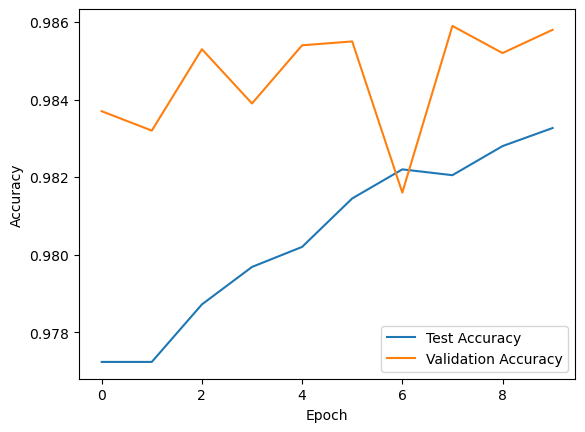

In [53]:
#plot the accuracy 
plt.plot(history.history['accuracy'], label='Test Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

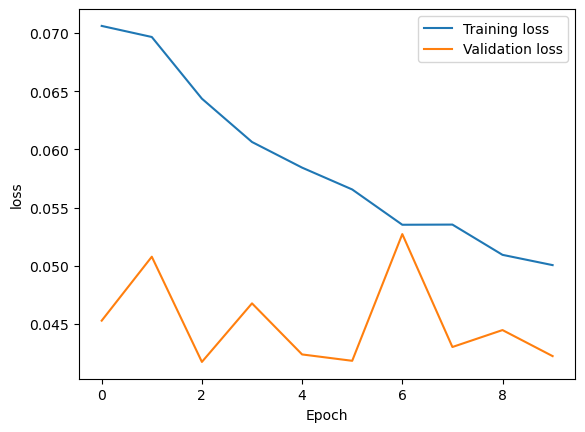

In [54]:
#plot the loss

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [55]:
#Display test loss and accuracy results

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0422 - accuracy: 0.9858
Test Accuracy: 0.98580002784729


## IMDB dataset



In [67]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [29]:
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=10000)

In [30]:
len(x_train)

25000

In [31]:
len(y_train)

25000

In [43]:
print(x_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    1   14   22   16
   43  530  973 1622 1385   65  458 4468   66 3941    4  173   36  256
    5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029 

Preprocess the data

In [32]:
max_length = 256

In [33]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

In [37]:
word_index = datasets.imdb.get_word_index()

# Reverse the word index mapping
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode a single review
def decode_review(index_sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in index_sequence])

# Decode the first training review
decoded_review = decode_review(x_train[0])
print(decoded_review)


1641221/1641221 [==============================] - 0s 0us/step
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all gr

Perform encoding 


In [40]:
import numpy as np


In [44]:
def ONeHotEncoding_fn(IMDBdata,dimension=10000):
    encoded_data=np.zeros((len(IMDBdata),dimension))
    for i,sequence in enumerate(IMDBdata):
        encoded_data[i,sequence]=1
    return  encoded_data  

In [45]:
train_data=ONeHotEncoding_fn(x_train)

In [46]:
test_data=ONeHotEncoding_fn(x_test)

In [48]:
print(train_data[0])

[1. 1. 1. ... 0. 0. 0.]


In [49]:
train_labels = np.asarray(y_train).astype("float32")
test_labels = np.asarray(y_test).astype("float32")

In [50]:
print(train_labels)

[1. 0. 0. ... 0. 1. 0.]


Train the Model.

In [57]:
model = models.Sequential()


model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 512)               33280     
                                                                 
 dense_5 (Dense)             (None, 1)                

In [62]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [63]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [64]:
print(partial_x_train.shape)

(15000, 10000)


In [65]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
469/469 [==============================] - 10s 17ms/step - loss: 0.3803 - accuracy: 0.8291 - val_loss: 0.2933 - val_accuracy: 0.8774
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1842 - accuracy: 0.9278 - val_loss: 0.3186 - val_accuracy: 0.8738
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1036 - accuracy: 0.9623 - val_loss: 0.3922 - val_accuracy: 0.8670
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0627 - accuracy: 0.9768 - val_loss: 0.4976 - val_accuracy: 0.8691
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0558 - accuracy: 0.9795 - val_loss: 0.5555 - val_accuracy: 0.8689
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0383 - accuracy: 0.9853 - val_loss: 0.6582 - val_accuracy: 0.8674
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0394 - accuracy: 0.9846 - val_loss: 0.6482 - val_accuracy: 0.8609
Epoc

Model Performance Plots

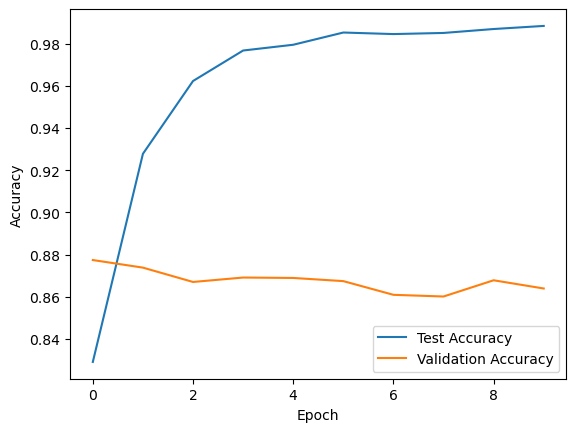

In [68]:
#plot the accuracy 
plt.plot(history.history['accuracy'], label='Test Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

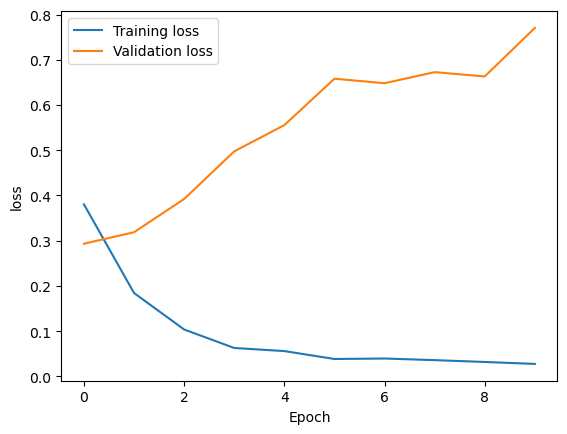

In [69]:
#plot the loss

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [73]:
#Display test loss and accuracy results

test_loss, test_accuracy = model.evaluate(test_data, y_test)
print(f'Test Accuracy: {test_accuracy}')

782/782 [==============================] - 3s 4ms/step - loss: 0.8124 - accuracy: 0.8539
Test Accuracy: 0.853879988193512
